<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Convolutional-Neural-Networks-(CNN,-ConvNet)" data-toc-modified-id="Convolutional-Neural-Networks-(CNN,-ConvNet)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Convolutional Neural Networks (CNN, ConvNet)</a></span><ul class="toc-item"><li><span><a href="#Why-CNNs?" data-toc-modified-id="Why-CNNs?-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Why CNNs?</a></span></li><li><span><a href="#Convolution-Operation" data-toc-modified-id="Convolution-Operation-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Convolution Operation</a></span></li><li><span><a href="#Example-with-edges-filters" data-toc-modified-id="Example-with-edges-filters-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Example with edges filters</a></span></li><li><span><a href="#Padding" data-toc-modified-id="Padding-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Padding</a></span></li><li><span><a href="#Strided-Convolutions" data-toc-modified-id="Strided-Convolutions-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Strided Convolutions</a></span></li><li><span><a href="#Convolutions-on-volumes-(RGB-images)" data-toc-modified-id="Convolutions-on-volumes-(RGB-images)-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Convolutions on volumes (RGB images)</a></span></li><li><span><a href="#Layers-in-ConvNets" data-toc-modified-id="Layers-in-ConvNets-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Layers in ConvNets</a></span></li><li><span><a href="#Schematic-Description-of-a-ConvNet" data-toc-modified-id="Schematic-Description-of-a-ConvNet-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Schematic Description of a ConvNet</a></span></li></ul></li><li><span><a href="#CNNs-in-Tensorflow" data-toc-modified-id="CNNs-in-Tensorflow-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>CNNs in Tensorflow</a></span></li><li><span><a href="#Hands-on" data-toc-modified-id="Hands-on-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Hands-on</a></span><ul class="toc-item"><li><span><a href="#steps" data-toc-modified-id="steps-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>steps</a></span></li><li><span><a href="#Dropout" data-toc-modified-id="Dropout-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Dropout</a></span></li><li><span><a href="#Augmentation" data-toc-modified-id="Augmentation-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Augmentation</a></span></li><li><span><a href="#Transfer-Learning" data-toc-modified-id="Transfer-Learning-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Transfer Learning</a></span></li></ul></li></ul></div>

In [4]:
import numpy as np 
import scipy
from scipy import signal
import pandas as pd 
import os
import glob
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
from time import time
import seaborn as sn
import PIL.Image
from numpy import asarray
from IPython.display import Image,IFrame


# Convolutional Neural Networks basics

and an example with classification

### Convolutional Neural Networks (CNN, ConvNet)

+ a class of artificial Neural Networks
+ widely used in computer vision*
+ learn hierarchy of features


*Computer vision is an essential, complex, wide-spread, and ever developing part of AI.
Computer vision tasks include:
- Image Classification
- Classification with localization
- Object detection (verify the presence of specific objects in an image)
- Image captioning
- action classification
- Semantic segmentation
- Instance segmentation 
- Neural Style Transfer


#### Why CNNs?
<center><img src='billy_low_high.jpeg' height=600 width=800></center>

- Need not to be restricted to 36X36px input images.

- Image of 1300 X 1300px --> Input on a layer of a FC (Dense) network with e.g. 1000 hidden units $\rightarrow$ parameters (weights) to calculate : (1000,1300x1300) = 1.69E9 parameters   (x3 for a color image) $\rightarrow$ Computationally expensive and data hungry. 

#### Convolution Operation

<center><img src='filters_conv/conv1.jpeg'></center>

<center><img src='filters_conv/conv2.jpeg'></center>

<center><img src='filters_conv/conv3.jpeg'></center>

<center><img src='anim_slides_2.gif'></center>

#### Example with edges filters

(edge detectors)

In [7]:
filter_v=np.array([[1,0,-1],[1,0,-1],[1,0,-1]])  # 3x3 vertical edges filter 
filter_h=np.array([[1,1,1],[0,0,0],[-1,-1,-1]])  # 3x3 horizontal edges filter 
filter_v_3d=np.dstack([filter_v]*3)                 # 3x3x3 vertical edges filter 
filter_h_3d=np.dstack([filter_h]*3)                 # 3x3x3 horizontal edges filter 


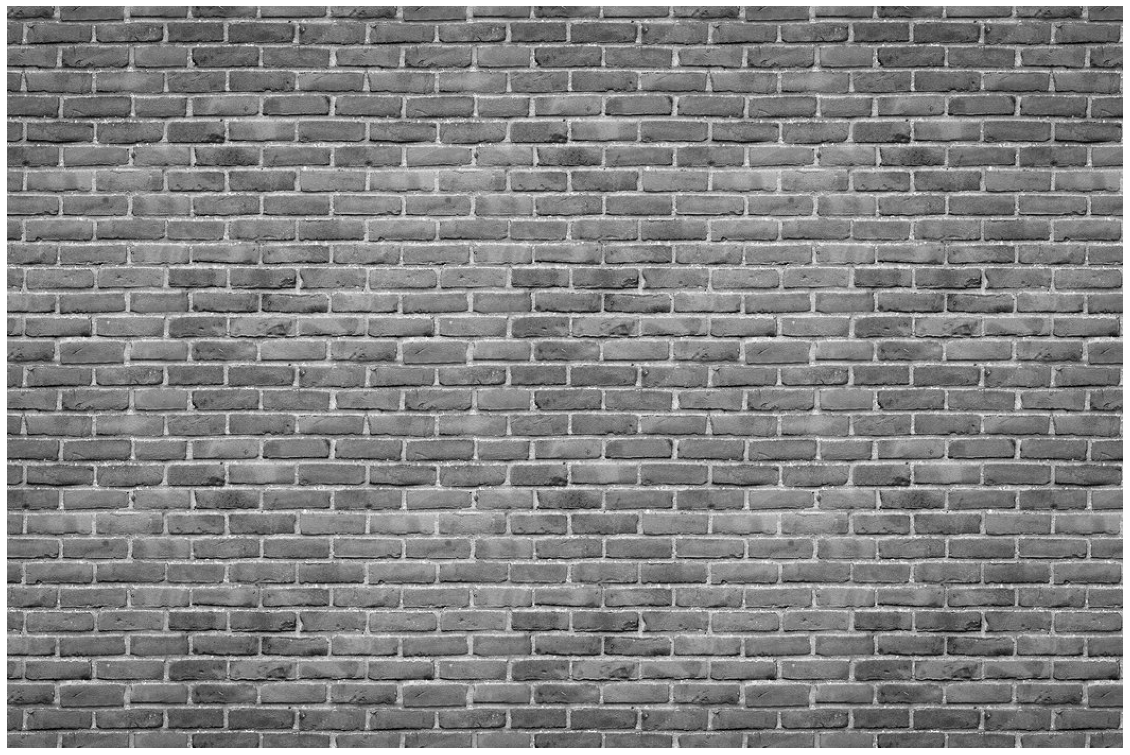

In [26]:
image = PIL.Image.open('brick2.jpeg').convert('L')
brick = asarray(image)
plt.figure(figsize=(20,18))
plt.imshow(brick,cmap='gray')
plt.axis('off')
plt.show()

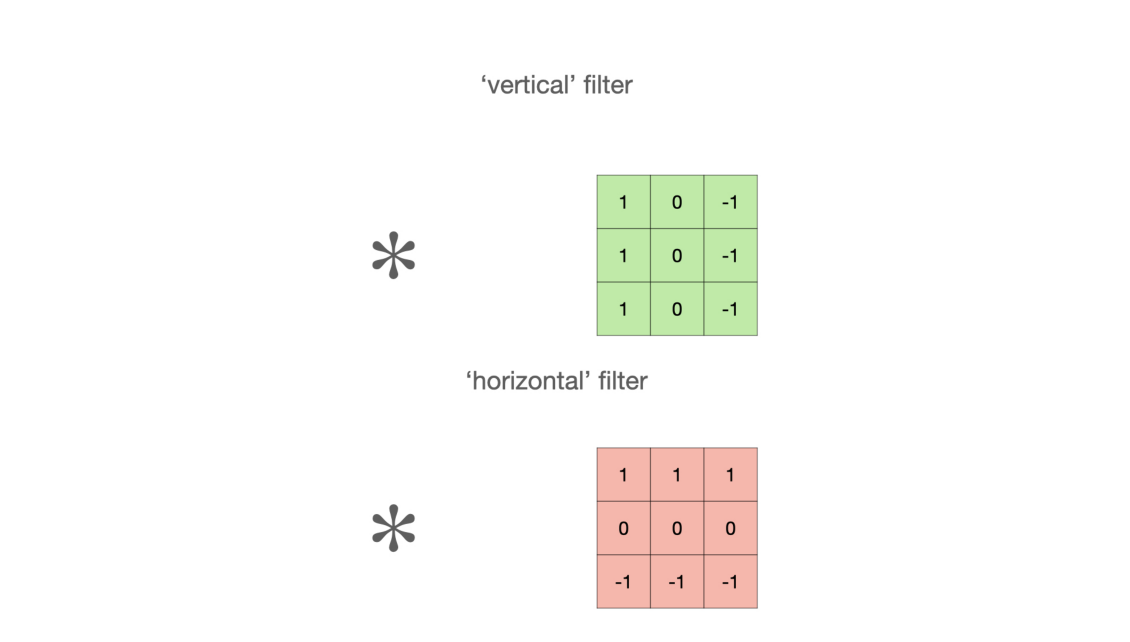

In [27]:
image = plt.imread('filters_conv.jpeg')
plt.figure(figsize = (20,20))
plt.imshow(image)
plt.axis('off')
plt.show()

In [25]:
import tabletext
data = [[1,0,-1],[1,0,-1],[1,0,-1]]
print(tabletext.to_text(data))

data = [[1,1,1],[0,0,0],[-1,-1,-1]]
print(tabletext.to_text(data))

┌───┬───┬────┐
│ 1 │ 0 │ -1 │
├───┼───┼────┤
│ 1 │ 0 │ -1 │
├───┼───┼────┤
│ 1 │ 0 │ -1 │
└───┴───┴────┘
┌────┬────┬────┐
│  1 │  1 │  1 │
├────┼────┼────┤
│  0 │  0 │  0 │
├────┼────┼────┤
│ -1 │ -1 │ -1 │
└────┴────┴────┘


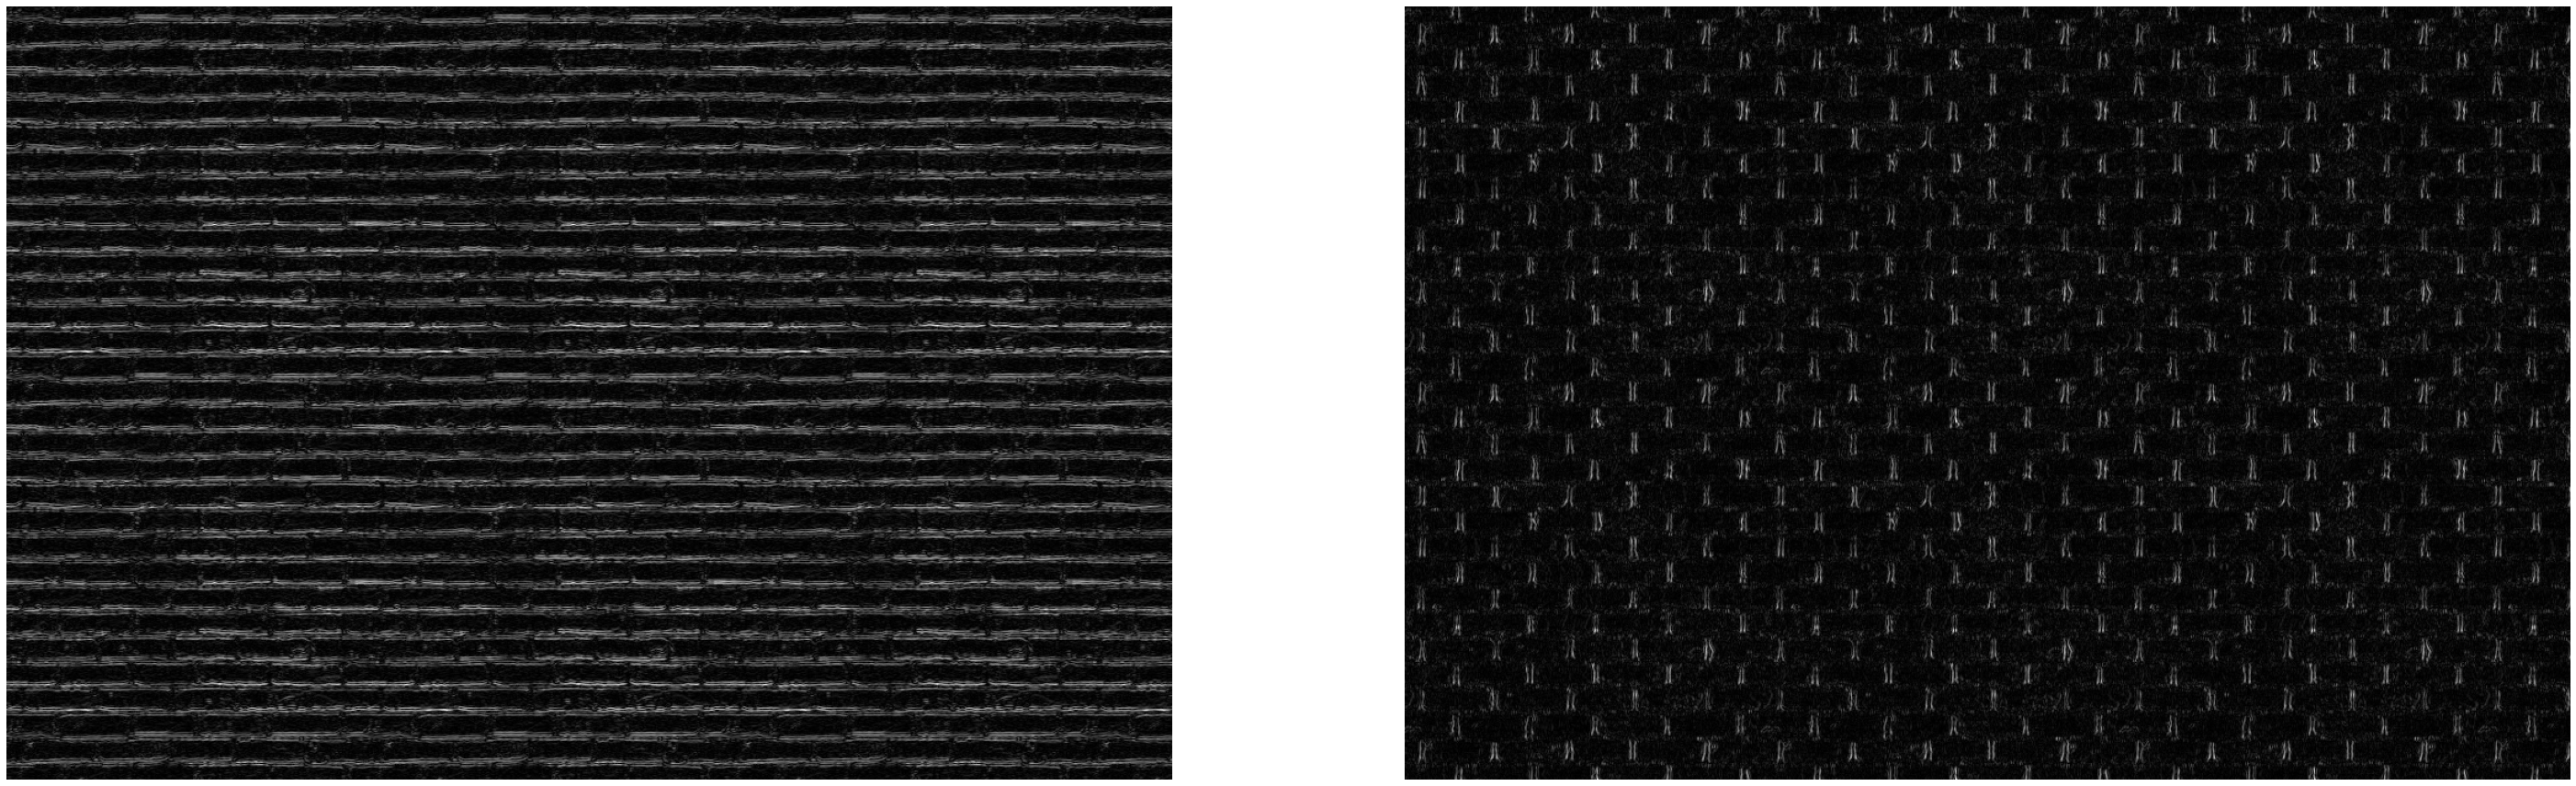

In [8]:
out_conv_h=signal.convolve2d(brick,filter_h,mode='valid')
out_conv_v=signal.convolve2d(brick,filter_v,mode='valid')
f, axarr = plt.subplots(1,2,figsize = (50,50))
axarr[0].imshow(np.absolute(out_conv_h),cmap='gray')
axarr[0].set_axis_off()
axarr[1].imshow(np.absolute(out_conv_v),cmap='gray')
axarr[1].set_axis_off()

plt.show()


In [ ]:
out_conv_v=signal.convolve2d(brick,filter_v,mode='valid')
out_conv_h=signal.convolve2d(brick,filter_h,mode='valid')

f, axarr = plt.subplots(1,2,figsize = (50,50))
axarr[0].imshow(np.absolute(out_conv_h),cmap='gray')
axarr[1].imshow(np.absolute(out_conv_v),cmap='gray')
plt.show()

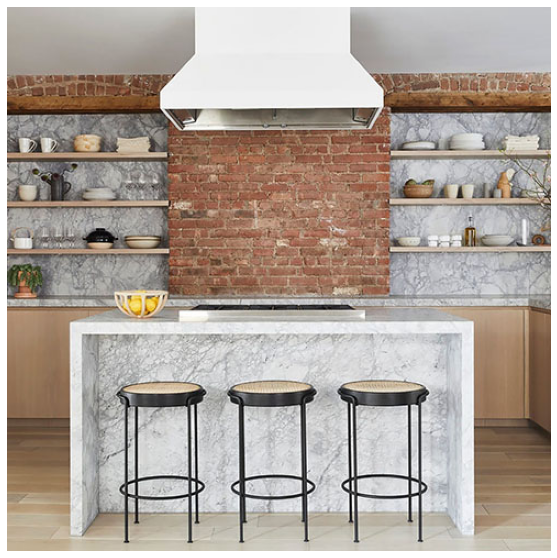

In [10]:
image = PIL.Image.open('brick.jpeg')
brick = asarray(image)
plt.figure(figsize=(10,10))
plt.imshow(brick)
plt.axis('off')
plt.show()

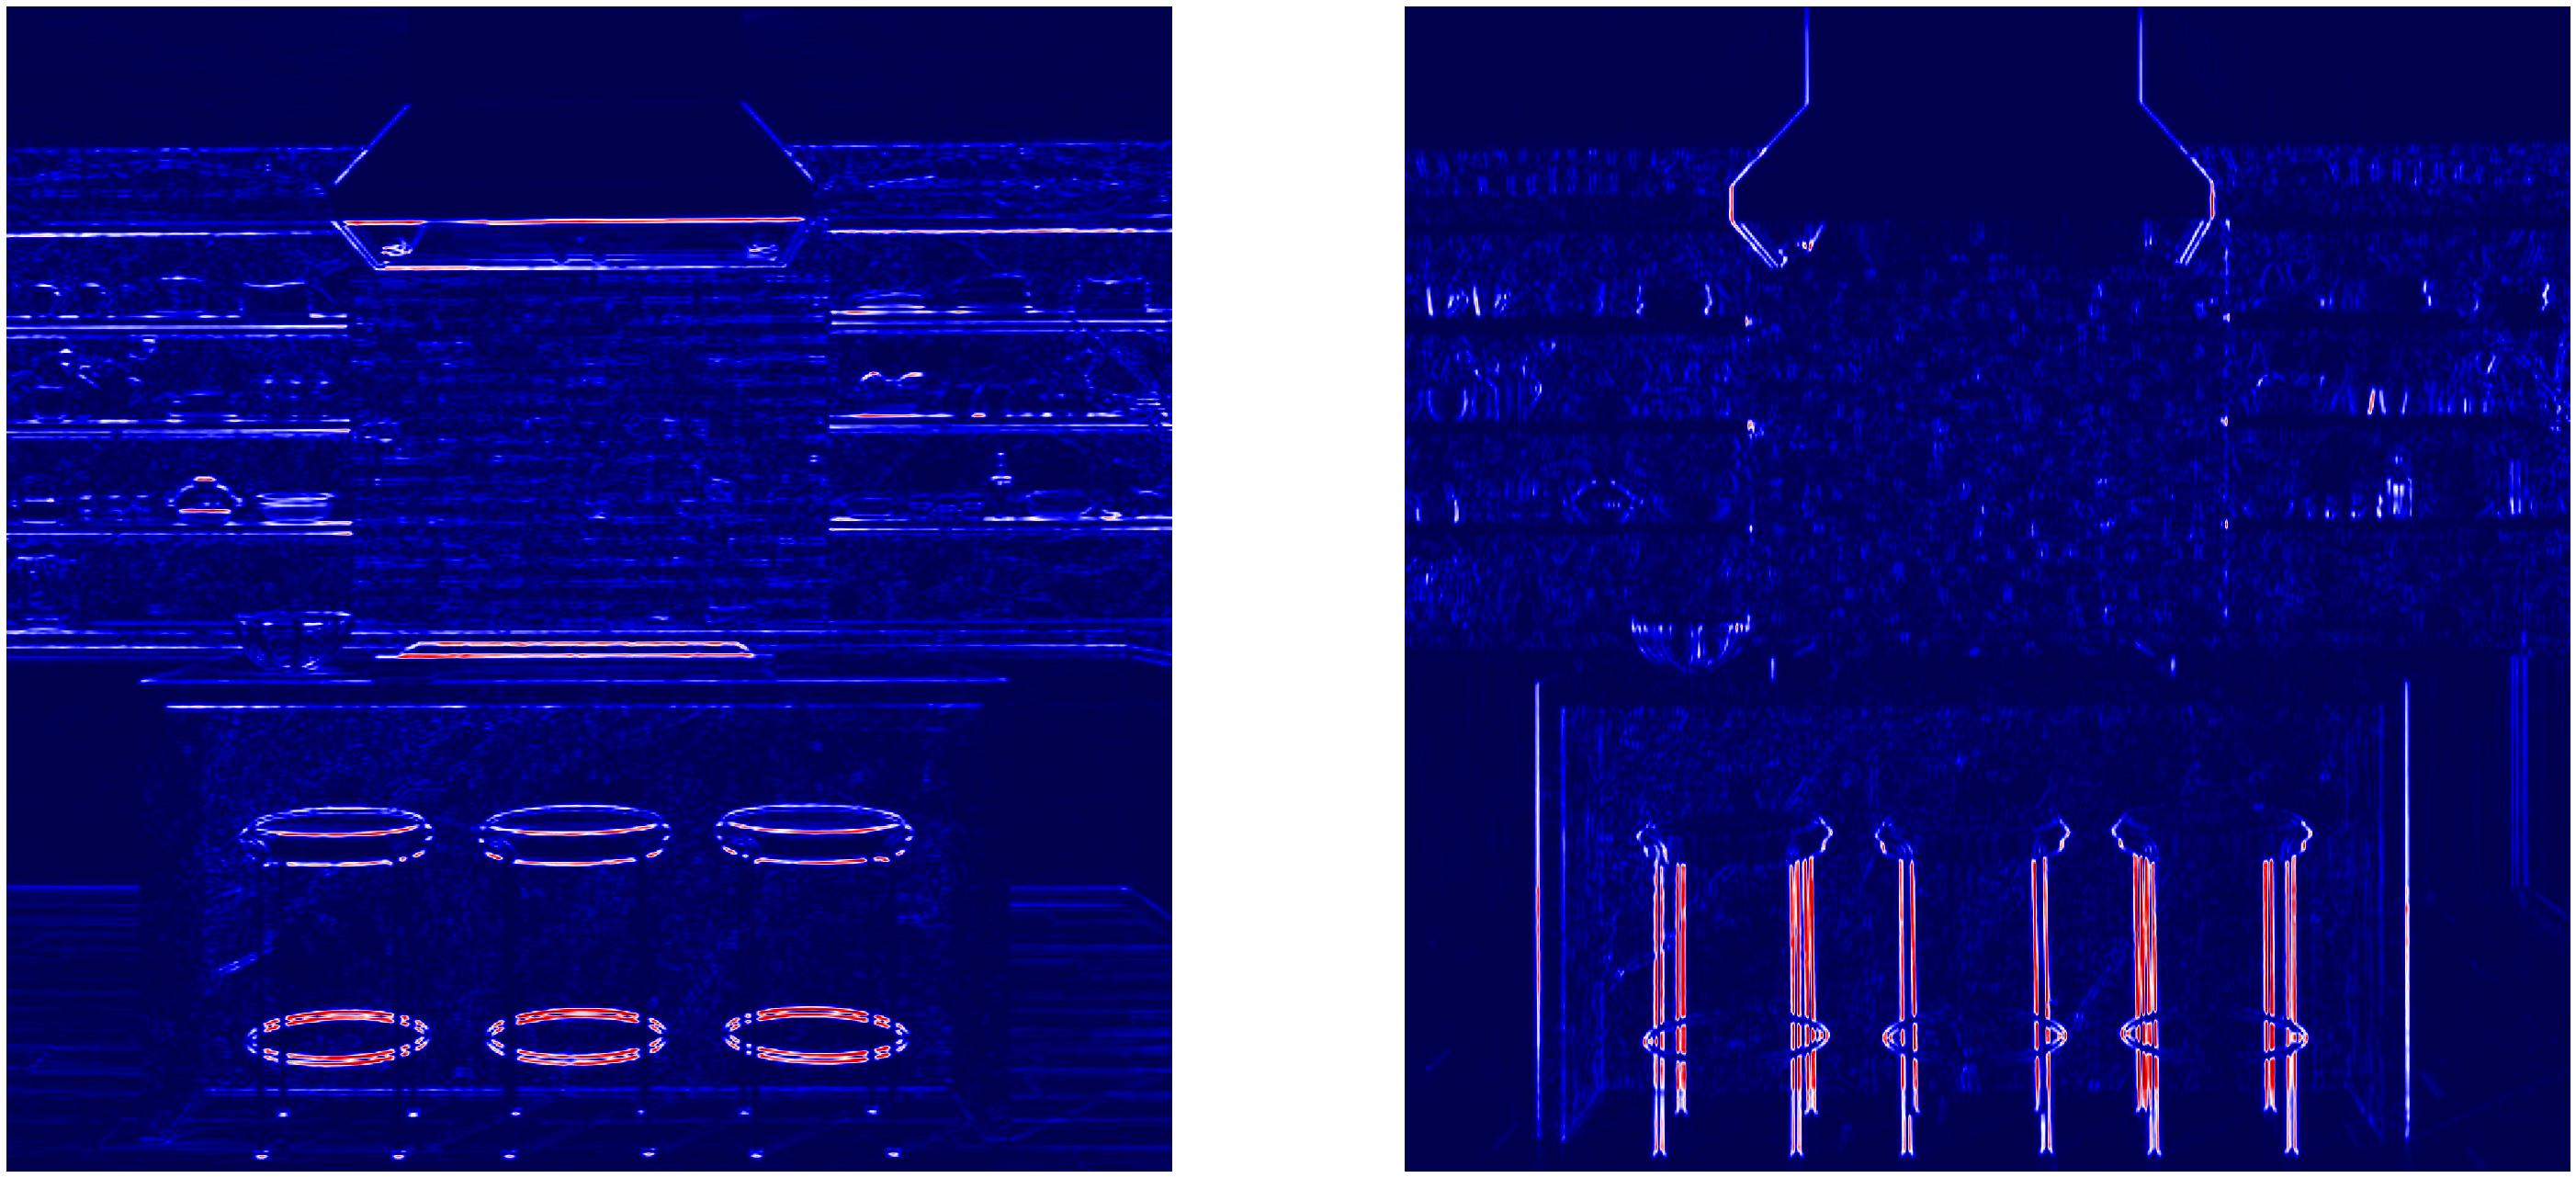

In [11]:
out_corr_v=signal.correlate(brick,filter_v_3d,mode='valid')
out_corr_h=signal.correlate(brick,filter_h_3d,mode='valid')

f, axarr = plt.subplots(1,2,figsize = (50,50))
axarr[0].imshow(np.absolute(out_corr_h),cmap='seismic')
axarr[0].set_axis_off()
axarr[1].imshow(np.absolute(out_corr_v),cmap='seismic')
axarr[1].set_axis_off()
plt.show()

In [4]:

data = [[1,1,1],[0,0,0],[-1,-1,-1]]
print(tabletext.to_text(data))

┌────┬────┬────┐
│  1 │  1 │  1 │
├────┼────┼────┤
│  0 │  0 │  0 │
├────┼────┼────┤
│ -1 │ -1 │ -1 │
└────┴────┴────┘


<center><img src='filters_conv/conv4.jpeg'></center>

#### Padding



<center><img src='filters_conv/padding1.jpeg'></center>

<center><img src='filters_conv/padding2.jpeg'></center>

<center><img src='filters_conv/padding3.jpeg'></center>

<center><img src='filters_conv/padding4.jpeg'></center>

#### Strided Convolutions

<center><img src='filters_conv/strides1.jpeg'></center>

<center><img src='filters_conv/strides2.jpeg'></center>

<center><img src='filters_conv/strides3.jpeg'></center>

<center><img src='filters_conv/strides4.jpeg'></center>

#### Convolutions on volumes (RGB images)

<center><img src='filters_conv/RGB_conv1.jpeg'></center>

<center><img src='filters_conv/RGB_conv2.jpeg'></center>

#### Layers in ConvNets

The building blocks (i.e. most commonly used types of layers in CNNs)
- Convolutional layers 
- Pooling layers 
    - Max Pooling
    - Average Pooling
    - Global Pooling
- Dense (Fully Connected) layers

<center><img src='filters_conv/pooling1.jpeg'></center>

#### Schematic Description of a ConvNet

<center><img src='filters_conv/convnet.jpeg'></center>

### CNNs in Tensorflow  

+ Conv Layer (2D)

+ Conv Block

+ Simple Conv Net

+ `Conv2D(#filters, (fx, fy), activation='relu',input_shape=(width,height,channels))`
    - `Conv2D(32,(3,3),activation='relu',input_size=(240,240,3))` [if this is the input layer] 
    - `Conv2D(128,(5,5),activation='relu')`
+ `MaxPooling2D(pool_size=(2, 2),strides=1)`
+ `Flatten()`  [no arguments]
+ `Dense(#output_units,activation)`
    - `Dense(512,activation='relu')`
    - `Dense(#N, activation='softmax')` [if last layer of N-class classification]
    - `Dense(2,activation='sigmoid') `  [if last layer of binary classification]

### Hands-on

- Simple classification example using a ConvNet

**Classification/Regression**

+ Regression: 
    - output is a prediction on a quantity which takes continuous values
+ Classification: 
    - output is a prediction on a class, i.e. discrete labels
        + binary classification
        + multi-class classification
            - single-label classification
            - multi-label classification    

#### steps 
1. Data
    + set of 8 different classes of images: airplane, car, cat, dog, flower, fruit, motorbike, person
    + create the relevant datasets    
2. CNN model
    + build the CNN model, train it with the given data, check performance
    + we will observe overfitting
3. Improve previous CNN model: i.e. avoid overfitting
    + Dropout (interfere in the model architecture)
    + Augmentation (interfere with the data)
4. Transfer learning
    + Do not use own CNN model, but borrow a pretrained one. Use it on our given data.

#### Dropout 
Dropout: A Simple Way to Prevent Neural Networks from Overfitting, JMLR (2014)
http://jmlr.org/papers/v15/srivastava14a.html
<center><img src='dropout_originalpaper2014_illustration.png'></center>

#### Augmentation

Augmenting the training dataset, by applying transformations to existing data (images in this case): flip, rotate, shear, shift, zoom, color distortion, etc.

<center><img src='cat_data_augmentation.png' width=1200 height=800></center>

#### Transfer Learning

<center><img src='pretrained.001.jpeg' width=1400 height=950></center>